<a href="https://colab.research.google.com/github/Rkgithub2023/Rkgithub2023/blob/main/DL_Project_Face_Mask_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install kaggle

In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


Downloading kaggle dataset using api

In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset


Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
from zipfile import ZipFile
dataset='/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  sample_data  with_mask1.jpeg  withmask.jpg  without_mask.jpeg


**Importing the dependencies**

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files=os.listdir('/content/data/with_mask')
without_mask_files=os.listdir('/content/data/without_mask')
print(with_mask_files[0:5])
print(without_mask_files[-5:])

['with_mask_1410.jpg', 'with_mask_1794.jpg', 'with_mask_248.jpg', 'with_mask_2047.jpg', 'with_mask_3340.jpg']
['without_mask_2849.jpg', 'without_mask_2946.jpg', 'without_mask_2727.jpg', 'without_mask_1475.jpg', 'without_mask_691.jpg']


Creating labels and assigning values

In [8]:
with_mask_labels=[1]*len(with_mask_files)
without_mask_labels=[0]*len(without_mask_files)
print(with_mask_labels[:5])

[1, 1, 1, 1, 1]


In [9]:
print(without_mask_labels[:5])

[0, 0, 0, 0, 0]


In [10]:
labels=with_mask_labels+without_mask_labels
print(labels[:5])
print(labels[-5:])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


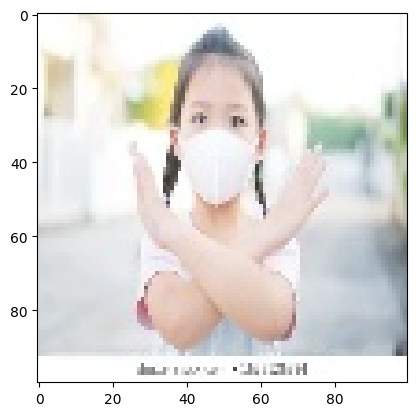

In [11]:
img=mpimg.imread('/content/data/with_mask/with_mask_3598.jpg')
plt.imshow(img)
plt.show()

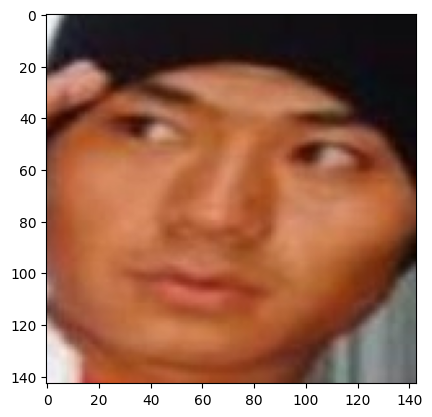

In [12]:
img=mpimg.imread('/content/data/without_mask/without_mask_1557.jpg')
plt.imshow(img)
plt.show()

Convert imgae to numpy array

In [13]:
imagedata=[]
def converttoarray(imgaefolderpath,imagelistname):
  path=imgaefolderpath
  imageslist=imagelistname
  for img_file in imageslist:
    image=Image.open(path+img_file)
    image=image.resize((128,128))
    image=image.convert('RGB')
    image=np.array(image)
    imagedata.append(image)

converttoarray('/content/data/with_mask/',with_mask_files)
converttoarray('/content/data/without_mask/',without_mask_files)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [14]:
type(imagedata)

list

In [15]:
len(imagedata)

7553

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[249, 249, 251],
        [ 52,  52,  54],
        [  0,   0,   3],
        ...,
        [ 37,  35,  34],
        [ 32,  30,  29],
        [ 26,  25,  23]],

       [[249, 249, 251],
        [ 52,  52,  54],
        [  0,   0,   2],
        ...,
        [ 59,  57,  51],
        [ 49,  46,  40],
        [ 28,  26,  19]],

       [[249, 249, 251],
        [ 52,  52,  54],
        [  0,   0,   0],
        ...,
        [ 47,  43,  37],
        [ 64,  59,  50],
        [ 60,  54,  46]]], dtype=uint8)
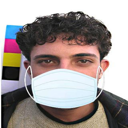

In [16]:
imagedata[0]

In [17]:
type(labels)

list

In [18]:
X=np.array(imagedata)
Y=np.array(labels)
type(X)

numpy.ndarray

**Splitting the data**

In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [20]:
X.shape,X_train.shape,X_test.shape

((7553, 128, 128, 3), (6042, 128, 128, 3), (1511, 128, 128, 3))

**scaling the data**

In [21]:
X_train_scale=X_train/255
X_test_scale=X_test/255
X_train_scale[0]

array([[[0.79607843, 0.7254902 , 0.66666667],
        [0.80392157, 0.73333333, 0.67058824],
        [0.81176471, 0.7372549 , 0.67843137],
        ...,
        [0.87058824, 0.81176471, 0.7372549 ],
        [0.87843137, 0.81960784, 0.74117647],
        [0.86666667, 0.80784314, 0.7254902 ]],

       [[0.78823529, 0.70980392, 0.65098039],
        [0.78039216, 0.70196078, 0.64705882],
        [0.75686275, 0.68627451, 0.63137255],
        ...,
        [0.65882353, 0.60392157, 0.54117647],
        [0.78431373, 0.73333333, 0.66666667],
        [0.85882353, 0.80784314, 0.7372549 ]],

       [[0.76078431, 0.68235294, 0.62352941],
        [0.72941176, 0.65490196, 0.6       ],
        [0.69019608, 0.61568627, 0.56470588],
        ...,
        [0.24313725, 0.20392157, 0.16862745],
        [0.38039216, 0.34117647, 0.29803922],
        [0.61176471, 0.57254902, 0.52156863]],

       ...,

       [[0.53333333, 0.51372549, 0.5372549 ],
        [0.52941176, 0.50980392, 0.53333333],
        [0.51372549, 0

Convolutional Neural network

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [23]:
#creating a sequentail
model=keras.Sequential()

#Passing the input as images
#Convo2D(node,filters,activation function,input shape --image size)
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPooling2D((2,2)))

#After max pooling passing to another convolution network
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))


#Now flattening the layer
model.add(Flatten())


#Now passing the data as input to ANN
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
#one hidden layer

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(32,activation='relu'))


#output
model.add(Dense(1,activation='sigmoid'))


Compile the model

In [24]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

After creating neural network and compiling we are going to training model

In [25]:
model_fit=model.fit(X_train_scale,Y_train,validation_split=0.1,epochs=10,batch_size=100)

Epoch 1/10
55/55 [==============================] - 141s 3s/step - loss: 0.5707 - acc: 0.7247 - val_loss: 0.2732 - val_acc: 0.8942
Epoch 2/10
55/55 [==============================] - 135s 2s/step - loss: 0.3232 - acc: 0.8762 - val_loss: 0.2071 - val_acc: 0.9223
Epoch 3/10
55/55 [==============================] - 139s 3s/step - loss: 0.3005 - acc: 0.8838 - val_loss: 0.2143 - val_acc: 0.9124
Epoch 4/10
55/55 [==============================] - 139s 3s/step - loss: 0.2541 - acc: 0.8972 - val_loss: 0.1736 - val_acc: 0.9223
Epoch 5/10
55/55 [==============================] - 136s 2s/step - loss: 0.2284 - acc: 0.9075 - val_loss: 0.1722 - val_acc: 0.9322
Epoch 6/10
55/55 [==============================] - 135s 2s/step - loss: 0.1988 - acc: 0.9198 - val_loss: 0.1680 - val_acc: 0.9256
Epoch 7/10
55/55 [==============================] - 132s 2s/step - loss: 0.1720 - acc: 0.9321 - val_loss: 0.1388 - val_acc: 0.9372
Epoch 8/10
55/55 [==============================] - 131s 2s/step - loss: 0.1489 - a

In [26]:
# Evaluate the model's performance on the test set
loss, accuracy = model.evaluate(X_test_scale, Y_test)

# Print the evaluation results
print(f'Test Accuracy: {accuracy}')
print(f'Test Loss: {loss}')

48/48 [==============================] - 9s 197ms/step - loss: 0.2219 - acc: 0.9298
Test Accuracy: 0.929847776889801
Test Loss: 0.221910297870636


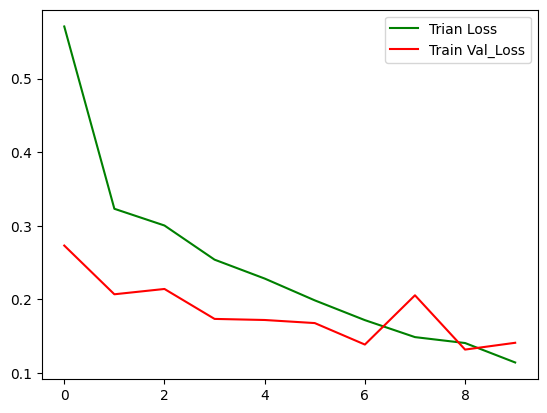

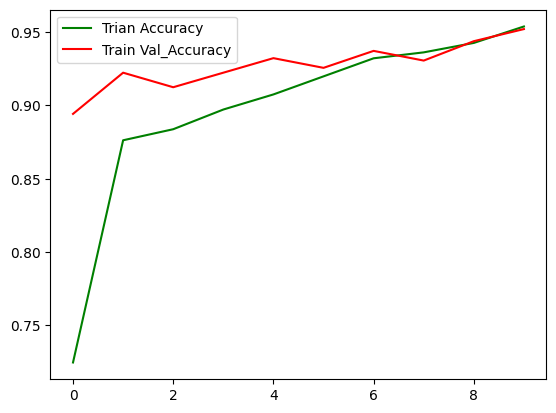

In [27]:
plt.plot(model_fit.history['loss'],label='Trian Loss',color='green')
plt.plot(model_fit.history['val_loss'],label='Train Val_Loss',color='red')
plt.legend()
plt.show()
plt.plot(model_fit.history['acc'],label='Trian Accuracy',color='green')
plt.plot(model_fit.history['val_acc'],label='Train Val_Accuracy',color='red')
plt.legend()
plt.show()

Predicting the model

given image path :/content/withmask.jpg


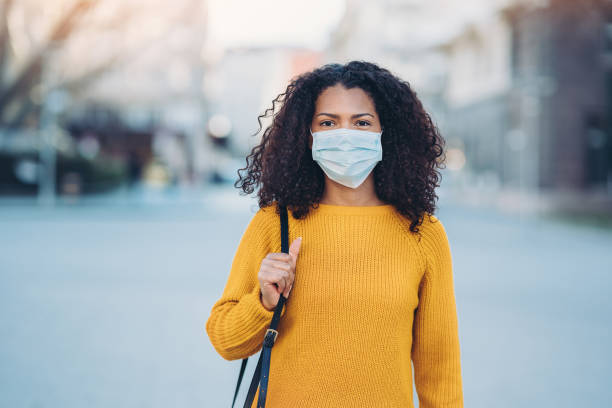

1/1 [==============================] - 0s 31ms/step
[[1.]]
the person is wearing mask!!


In [34]:
imagepath=input('given image path :')
input_image=cv2.imread(imagepath)
cv2_imshow(input_image)

input_image_resize=cv2.resize(input_image,(128,128))
input_image_scaled=input_image_resize/255
input_image_reshape=np.reshape(input_image_scaled,[1,128,128,3])

input_predict=model.predict(input_image_reshape)
print(input_predict)

# input_predict_label=np.argmax(input_predict)
# print(input_predict_label)

if input_predict>0.5:
  print('the person is wearing mask!!')
else:
  print('the person is not wearing mask!!')

In [33]:
model.save('/content/drive/My Drive/model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
